In [1]:
import sys

%load_ext autoreload
%autoreload 2

# needed to import from SanPy which is one folder up
sys.path.append("..") # Adds higher directory to python modules path.

from SanPy import bAnalysis
from SanPy import bAnalysisPlot

from SanPy import bAnalysis

abfFile = '/Users/cudmore/Sites/bAnalysis/data/19221021.abf'
abfFile = '/Users/cudmore/Sites/bAnalysis/data/19114001.abf'
ba = bAnalysis.bAnalysis(file=abfFile)

ba.getDerivative(medianFilter=5) # derivative
ba.spikeDetect(dVthresholdPos=100, minSpikeVm=-20, medianFilter=0)



bAnalysis.spikeDetect0()
	dVthresholdPos: 100
	minSpikeVm: -20
	medianFilter: 0
bAnalysis.spikeDetect() for file /Users/cudmore/Sites/bAnalysis/data/19114001.abf detected 103 spikes in 0.05 seconds


In [2]:
from matplotlib.pyplot import *
%matplotlib inline
 
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

# Import the necessary packages and modules
import matplotlib.pyplot as plt
import numpy as np

# Prepare the data
#x = np.linspace(0, 10, 100)

plt.rcParams['figure.figsize'] = 10, 6

#plt.plot(x, x, label='linear')

#savefig('sample.pdf')


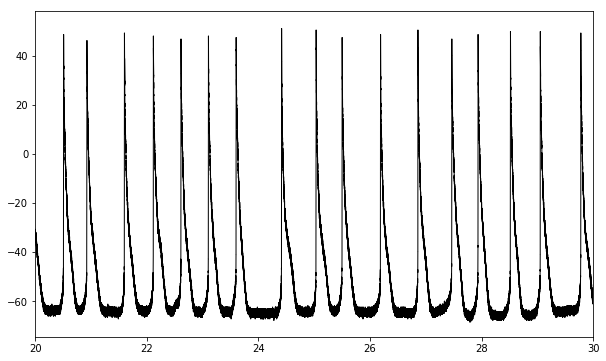

In [3]:
x = ba.abf.sweepX
y = ba.abf.sweepY

xMin = 20
xMax = 30
plt.xlim(xMin,xMax)

#plt.plot(x, y, marker='o', linestyle='--', color='r', label='Square')
plt.plot(x,y, color='k', linewidth='1')
savefig('sample.pdf')


,Time 1,LuDi.Z1.Vessel Length,LuDi.Z2.Vessel Length
0,4608.46,14.85,19.98
1,4608.53,14.56,20.12
2,4608.60,14.29,19.96
3,4608.66,14.78,20.05
4,4608.73,15.01,19.98


<IPython.core.display.Javascript object>


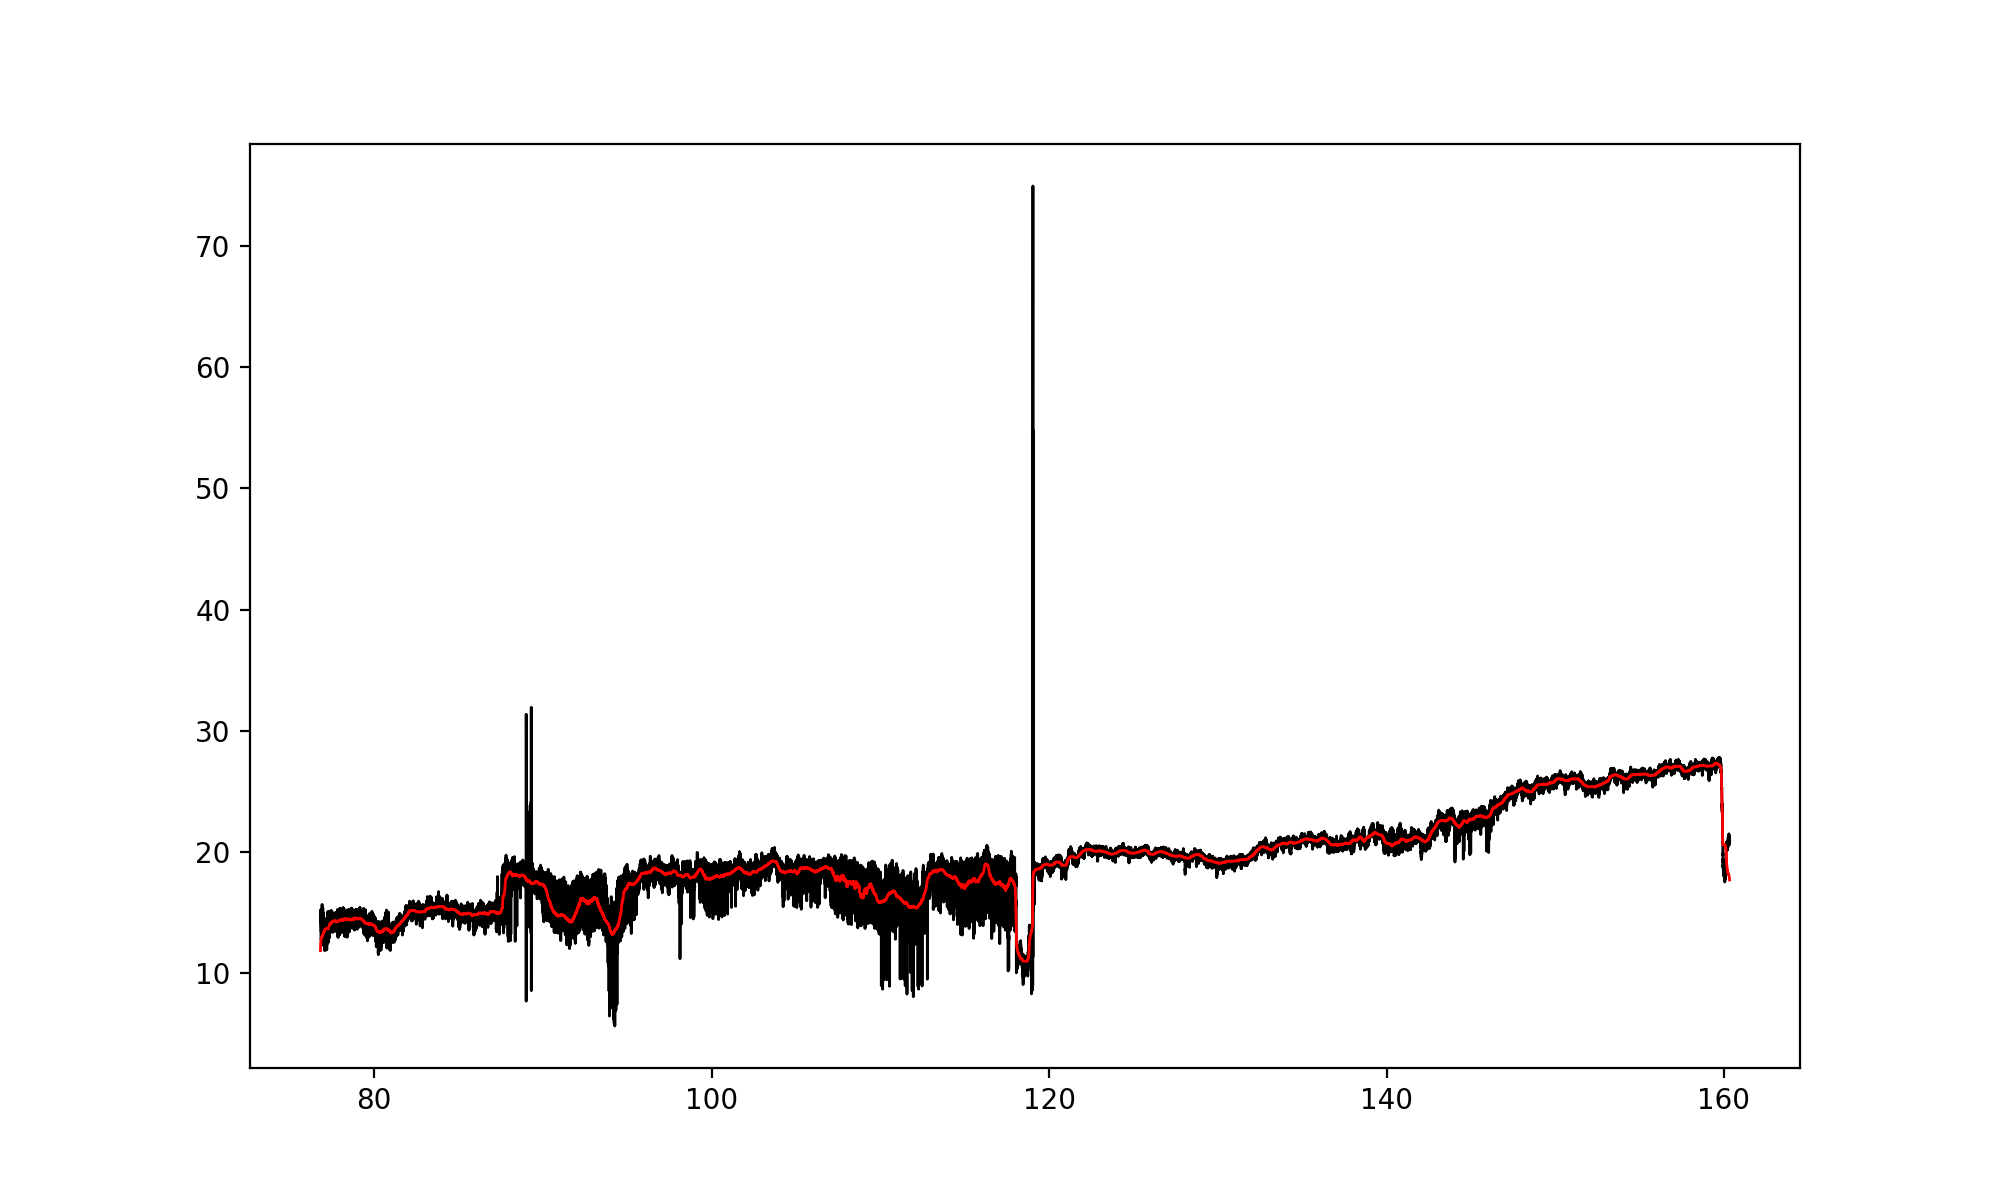

In [3]:
#
# import libraries
from matplotlib.pyplot import *
#%matplotlib inline
%matplotlib notebook

from IPython.display import display, set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

import matplotlib.pyplot as plt
import pandas as pd
import scipy.signal
from scipy.signal import savgol_filter

plt.rcParams['figure.figsize'] = 10, 6

#
# load .txt
filename = '20190809_short.txt'
df = pd.read_csv(filename, sep='\t')

#
# verify it loaded
display(df[:5])

# time
myTime = df['Time 1'].values
myTime /= 60 # seconds to minutes

# diameter
myDiameter = df['LuDi.Z1.Vessel Length'].values

# filtered diameter 1, median filter prserves boundaries or transitions
kernel_size = 501 #51
myDiameter_filtered_1 = scipy.signal.medfilt(myDiameter, kernel_size=kernel_size)

# filtered diameter 1
windowSize = 501 #51
polynomialOrder = 2
myDiameter_filtered_2 = scipy.signal.savgol_filter(myDiameter, windowSize, polynomialOrder)

#
# plot
if 1:
    #plt.plot(myTime, myDiameter, color='k', linewidth='1')
    plt.plot(myTime, myDiameter_filtered_1, 'r', linewidth='1')
    #plt.axes.Axes.axes.set_xlim([80,160])
    plt.show()
    savefig('diameter_raw.pdf')

if 0:
    plt.plot(myTime, myDiameter, color='k', linewidth='1')
    plt.plot(myTime, myDiameter_filtered_2, color='g', linewidth='1')
    plt.show()
    #savefig('diameter_filtered.pdf')


if 0:
    plt.plot(myTime, myDiameter_filtered_1, color='r', linewidth='1')
    plt.plot(myTime, myDiameter_filtered_2, color='g', linewidth='1')
    plt.show()
    #savefig('diameter_filtered.pdf')
